In [1]:
#import the libraries
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Data_for_UCI_named.csv')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
df.drop('stab', axis = 1, inplace = True)

In [4]:
df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [5]:
#checking for null values in the dataset
df.isna().sum()


tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stabf    0
dtype: int64

In [6]:
x = df.drop(columns = 'stabf')
y = df['stabf']

In [7]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
y_train.value_counts()


unstable    5092
stable      2908
Name: stabf, dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
x_train_st = scaler.fit_transform(x_train)
x_test_st = scaler.transform(x_test)

In [10]:
from sklearn.ensemble import RandomForestClassifier
clf =  RandomForestClassifier(random_state=1)
clf.fit(x_train_st,y_train)

RandomForestClassifier(random_state=1)

In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [39]:
from sklearn import metrics
predictions = clf.predict(x_test_st)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions,digits=4))

0.929
[[ 625   87]
 [  55 1233]]
              precision    recall  f1-score   support

      stable     0.9191    0.8778    0.8980       712
    unstable     0.9341    0.9573    0.9456      1288

    accuracy                         0.9290      2000
   macro avg     0.9266    0.9176    0.9218      2000
weighted avg     0.9288    0.9290    0.9286      2000



In [13]:
from sklearn.ensemble import ExtraTreesClassifier
etc =  ExtraTreesClassifier( random_state=1)
etc.fit(x_train_st,y_train)

ExtraTreesClassifier(random_state=1)

In [14]:
predictions = etc.predict(x_test_st)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.928
[[ 606  106]
 [  38 1250]]
              precision    recall  f1-score   support

      stable       0.94      0.85      0.89       712
    unstable       0.92      0.97      0.95      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.91      0.92      2000
weighted avg       0.93      0.93      0.93      2000



In [15]:
from xgboost import XGBClassifier
xgb = XGBClassifier( random_state=1)
xgb.fit(x_train_st,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
predictions = xgb.predict(x_test_st)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions,digits=4))

0.9455
[[ 648   64]
 [  45 1243]]
              precision    recall  f1-score   support

      stable     0.9351    0.9101    0.9224       712
    unstable     0.9510    0.9651    0.9580      1288

    accuracy                         0.9455      2000
   macro avg     0.9430    0.9376    0.9402      2000
weighted avg     0.9453    0.9455    0.9453      2000



In [17]:
from lightgbm import LGBMClassifier
lgb =  LGBMClassifier (random_state=1)
lgb.fit(x_train_st,y_train)

LGBMClassifier(random_state=1)

In [41]:
predictions = lgb.predict(x_test_st)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions,digits=4))

0.9375
[[ 635   77]
 [  48 1240]]
              precision    recall  f1-score   support

      stable     0.9297    0.8919    0.9104       712
    unstable     0.9415    0.9627    0.9520      1288

    accuracy                         0.9375      2000
   macro avg     0.9356    0.9273    0.9312      2000
weighted avg     0.9373    0.9375    0.9372      2000



In [19]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score
#acc = make_scorer(custom_scorer, actual_scorer = accuracy_score)

In [48]:
n_estimators = [50,100,300,500,1000]
min_samples_split = [2,3,5,7,9]
min_samples_leaf =[1,2,4,6,8]
max_features =['auto','sqrt','log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'max_features':max_features}
random_cv = RandomizedSearchCV(estimator=etc,
            param_distributions=hyperparameter_grid,cv=5,n_iter=10,scoring='accuracy',n_jobs=-1,verbose=1,random_state=1)

In [49]:
random_cv.fit(x_train_st,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.7min finished


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [50, 100, 300, 500,
                                                         1000]},
                   random_state=1, scoring='accuracy', verbose=1)

In [50]:
random_cv.best_estimator_

ExtraTreesClassifier(max_features=None, min_samples_leaf=8, n_estimators=1000,
                     random_state=1)

In [23]:
etc_cv =  ExtraTreesClassifier(max_features='sqrt', min_samples_leaf=2,
                     min_samples_split=7, n_estimators=300, random_state=1)
etc_cv.fit(x_train_st,y_train)

ExtraTreesClassifier(max_features='sqrt', min_samples_leaf=2,
                     min_samples_split=7, n_estimators=300, random_state=1)

In [37]:
predictions = etc_cv.predict(x_test_st)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions, digits=4))

0.927
[[ 590  122]
 [  24 1264]]
              precision    recall  f1-score   support

      stable     0.9609    0.8287    0.8899       712
    unstable     0.9120    0.9814    0.9454      1288

    accuracy                         0.9270      2000
   macro avg     0.9364    0.9050    0.9176      2000
weighted avg     0.9294    0.9270    0.9256      2000



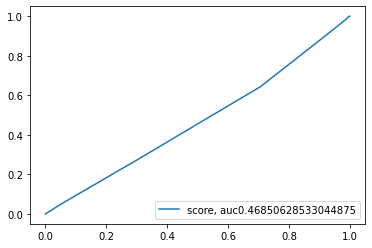

In [32]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
y_pr = etc.predict_proba(x_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pr,pos_label='unstable')
auc = metrics.roc_auc_score(y_test, y_pr)
plt.plot(fpr,tpr,label="score, auc"+str(auc))
plt.legend(loc=4)
plt.show()         
         

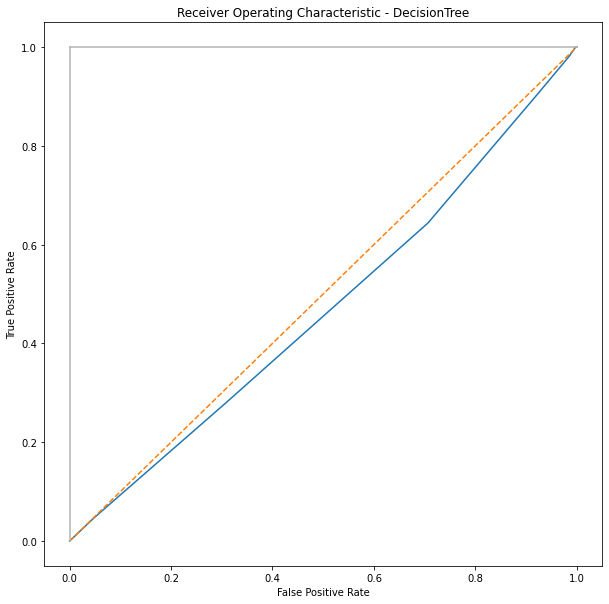

In [31]:
 # Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [27]:
y_test

9953    unstable
3850    unstable
4962      stable
3886      stable
5437    unstable
          ...   
3919      stable
162       stable
7903      stable
2242    unstable
2745    unstable
Name: stabf, Length: 2000, dtype: object